# TME2 - SPLEX
**Podlejski - Perrin**

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

path = "../TME1/"


## Preliminaries



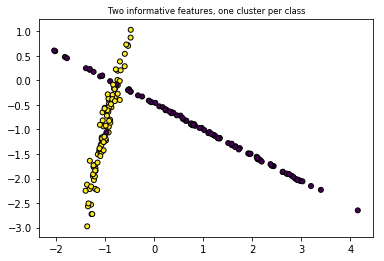

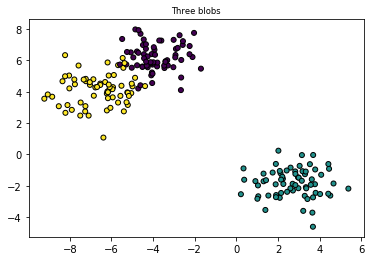

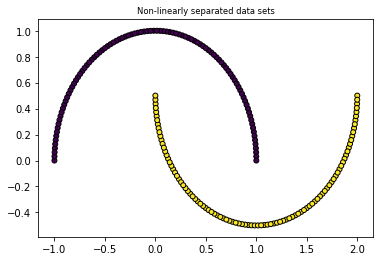

In [2]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.show()

# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.show()

# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')
plt.show()

## K-MEANS

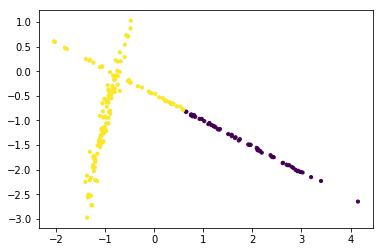

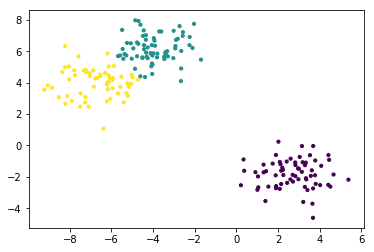

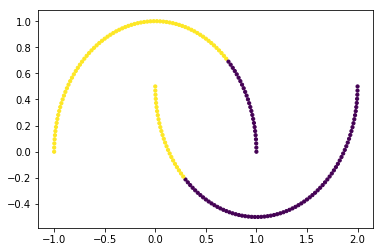

In [5]:
km2 = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km3 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)

km2.fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=km2.labels_)
plt.show()


km3.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=km3.labels_)
plt.show()

km2.fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=km2.labels_)
plt.show()

## HIERARCHICAL CLUSTERING

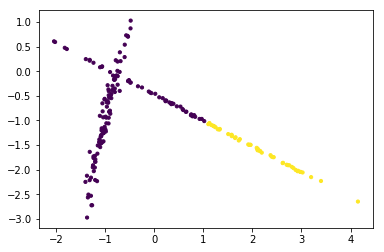

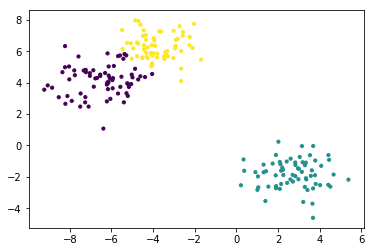

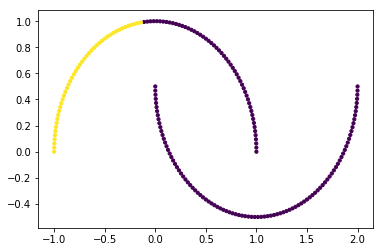

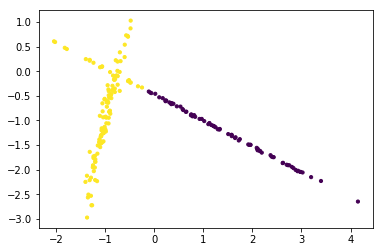

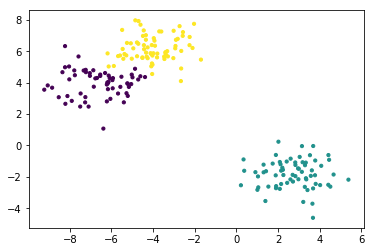

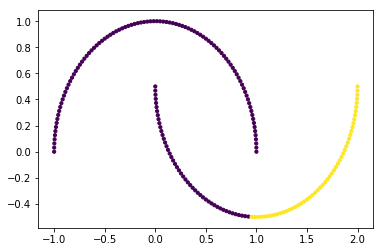

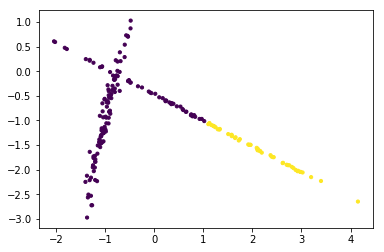

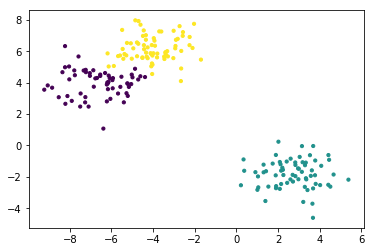

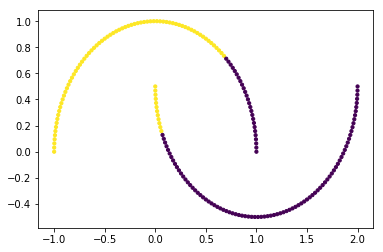

In [13]:
d = {}
for linkage in ('ward', 'average', 'complete'):
    d[linkage] = {}
    d[linkage][2] = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    d[linkage][3] = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    d[linkage][2] .fit(X1)
    plt.scatter(X1[:, 0], X1[:, 1], s=10, c= d[linkage][2].labels_)
    plt.show()
    d[linkage][3] .fit(X2)
    plt.scatter(X2[:, 0], X2[:, 1], s=10, c= d[linkage][3].labels_)
    plt.show()
    d[linkage][2].fit(X3)
    plt.scatter(X3[:, 0], X3[:, 1], s=10, c= d[linkage][2].labels_)
    plt.show()

## SPECTRAL CLUSTERING

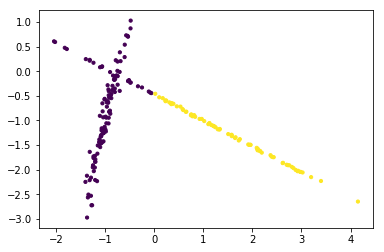

/home/gr3w/.local/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


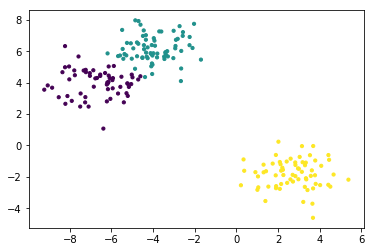

/home/gr3w/.local/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


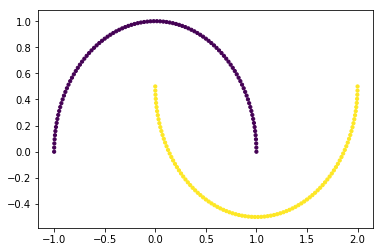

In [11]:


spectral2 = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',affinity="nearest_neighbors")
spectral3 = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack',affinity="nearest_neighbors")

spectral2.fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=spectral2.labels_)
plt.show()
spectral3.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=spectral3.labels_)
plt.show()
spectral2.fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=spectral2.labels_)
plt.show()

## ANALYSIS OF THE RESULTS OF CLUSTERING

In [22]:
X = {}
X[1] = {}
X[2]= {}
X[3]= {}

for j in [[km2,'kmeans'],[d['ward'][2],"ward"],[d['average'][2],"average"],[d['complete'][2],"complete"],[spectral2,"spectral"]]:
    clust = j[0]
    name = j[1]
    clust.fit(X1)
    X[1][name] = {}
    X[1][name]['homogeneity'] =  metrics.homogeneity_score(Y1,clust.labels_)
    X[1][name]['completeness'] = metrics.completeness_score(Y1,clust.labels_)
    X[1][name]['vmeasure'] = metrics.v_measure_score(Y1,clust.labels_)
    X[1][name]['adj_rand_score'] = metrics.adjusted_rand_score(Y1,clust.labels_)
    X[1][name]['silhouette'] = metrics.silhouette_score(X1,clust.labels_)
    clust.fit(X3)
    X[3][name] = {}
    X[3][name]['homogeneity'] =  metrics.homogeneity_score(Y3,clust.labels_)
    X[3][name]['completeness'] = metrics.completeness_score(Y3,clust.labels_)
    X[3][name]['vmeasure'] = metrics.v_measure_score(Y3,clust.labels_)
    X[3][name]['adj_rand_score'] = metrics.adjusted_rand_score(Y3,clust.labels_)
    X[3][name]['silhouette'] = metrics.silhouette_score(X3,clust.labels_)


for j in [[km3,'kmeans'],[d['ward'][3],"ward"],[d['average'][3],"average"],[d['complete'][3],"complete"],[spectral3,"spectral"]]:
    clust = j[0]
    name = j[1]
    clust.fit(X2)
    X[2][name] = {}
    X[2][name]['homogeneity'] =  metrics.homogeneity_score(Y2,clust.labels_)
    X[2][name]['completeness'] = metrics.completeness_score(Y2,clust.labels_)
    X[2][name]['vmeasure'] = metrics.v_measure_score(Y2,clust.labels_)
    X[2][name]['adj_rand_score'] = metrics.adjusted_rand_score(Y2,clust.labels_)
    X[2][name]['silhouette'] = metrics.silhouette_score(X2,clust.labels_)

for i in X.keys():
    s = str(i)+ ":     "
    for k in X[i]['kmeans'].keys():
        s += k + ", "
    print(s)
    for k in X[i].keys():
        s = str(k)
        for j in X[i][k]:
            s +=  str(X[i][k][j]) + ", "
        print(s)
    print()
        

/home/gr3w/.local/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/gr3w/.local/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


1:     homogeneity, completeness, vmeasure, silhouette, adj_rand_score, 
spectral0.5620490142300014, 0.5845140432391339, 0.5730614459728332, 0.5528241299621613, 0.5755780067029083, 
kmeans0.3982096896556922, 0.44874700858539807, 0.421970585730807, 0.581394083723311, 0.3572518738636275, 
average0.5985615408197036, 0.6164251470981199, 0.6073620221788283, 0.5396814270546408, 0.6222764875456538, 
ward0.2985996792841476, 0.37170949161651107, 0.3311675859497171, 0.5787339730048067, 0.2275079995713399, 
complete0.2985996792841476, 0.37170949161651107, 0.3311675859497171, 0.5787339730048067, 0.2275079995713399, 

2:     homogeneity, completeness, vmeasure, silhouette, adj_rand_score, 
spectral0.8554246863808403, 0.8571867061951886, 0.8563047898611859, 0.6210032234465254, 0.8733254786049457, 
kmeans0.8827820783513118, 0.8846004494347877, 0.8836903284777265, 0.622496663283777, 0.89988626534907, 
average0.8554246863808403, 0.8571867061951883, 0.8563047898611857, 0.6089265142161651, 0.873325478604

Optimality :

    For X1 -> average
    
    For X2 -> kmeans or ward
    
    For X3 -> spectral